In [417]:
import csv
import pandas as pd
import numpy as np
import scipy.stats as stats

In [464]:
# loading the data

# cost of many colleges and universities, includes in-state, out-of-state
tuition_cost_2018_2019 = pd.read_csv('C:\\Users\\SamDe\\Desktop\\MS\\IST_652_Python\\project\\main_dataset\\tuition_cost.csv')
# aggregated tuition costs by type of school
historical_tuition_1985_2017 = pd.read_csv('C:\\Users\\SamDe\\Desktop\\MS\\IST_652_Python\\project\\main_dataset\\historical_tuition.csv')
# after scholarships and awards
tuition_income_2010_2018 = pd.read_csv('C:\\Users\\SamDe\\Desktop\\MS\\IST_652_Python\\project\\main_dataset\\tuition_income.csv')
# median income for each state as well as the entire country
income_by_state_1984_2018 = pd.read_csv('C:\\Users\\SamDe\\Desktop\\MS\\IST_652_Python\\project\\main_dataset\\income_by_state.csv')
# demographic diversity data for a variety of schools
diversity_school_2014 = pd.read_csv('C:\\Users\\SamDe\\Desktop\\MS\\IST_652_Python\\project\\main_dataset\\diversity_school.csv')
# top 25 ranked national universities, includes name, state, and region
top_25 = pd.read_csv('C:\\Users\\SamDe\\Desktop\\MS\\IST_652_Python\\project\\tuition_cost_analysis\\top_25_accredited_institutions_select_fields_with_regions.csv')

,institution_name,state,ranking,region
0,Princeton University,NJ,1,N
1,Harvard University,MA,2,N
2,Columbia University,NY,3,N
3,Yale University,CT,4,N
4,Massachusetts Institute of Technology,MA,4,N
5,University of Chicago,IL,6,M
6,Stanford University,CA,6,W
7,University of Pennsylvania,PA,8,N
8,California Institute of Technology,CA,9,W
9,Northwestern University,IL,9,M


In [419]:
# after analyzing the data, I have determined that I want to investigate diversity at the top-ranked schools and compare them to all schools
# I would also like to do a regional analysis

In [420]:
# inner join on the top 25 and diversity tables using the name of the school
master = pd.merge(top_25,diversity_school_2014,left_on='institution_name',right_on='name')

In [421]:
len(master.name.unique())
master.name.unique()
# there is no diversity data for Georgetown

array(['Princeton University', 'Harvard University',
       'Columbia University', 'Yale University',
       'Massachusetts Institute of Technology', 'University of Chicago',
       'Stanford University', 'University of Pennsylvania',
       'California Institute of Technology', 'Northwestern University',
       'Johns Hopkins University', 'Duke University', 'Dartmouth College',
       'Brown University', 'Vanderbilt University',
       'Washington University in St. Louis', 'Rice University',
       'Cornell University', 'University of Notre Dame',
       'University of California: Los Angeles', 'Emory University',
       'University of California: Berkeley',
       'University of Southern California', 'University of Michigan'],
      dtype=object)

In [422]:
# remove unnecessary columns from dataframe
del master['institution_name'], master['state_y']

In [423]:
master.head(11)

,state_x,ranking,region,name,total_enrollment,category,enrollment
0,NJ,1,N,Princeton University,8088,Women,3669
1,NJ,1,N,Princeton University,8088,American Indian / Alaska Native,10
2,NJ,1,N,Princeton University,8088,Asian,1282
3,NJ,1,N,Princeton University,8088,Black,474
4,NJ,1,N,Princeton University,8088,Hispanic,571
5,NJ,1,N,Princeton University,8088,Native Hawaiian / Pacific Islander,7
6,NJ,1,N,Princeton University,8088,White,3494
7,NJ,1,N,Princeton University,8088,Two Or More Races,281
8,NJ,1,N,Princeton University,8088,Unknown,277
9,NJ,1,N,Princeton University,8088,Non-Resident Foreign,1692


In [424]:
master.iloc[1:6, 6].sum()

2344

In [425]:
master.iloc[0:33,]
# the index of the women is the first of the school
# each school has 11 entries
# the index of total minority is the 11th value

,state_x,ranking,region,name,total_enrollment,category,enrollment
0,NJ,1,N,Princeton University,8088,Women,3669
1,NJ,1,N,Princeton University,8088,American Indian / Alaska Native,10
2,NJ,1,N,Princeton University,8088,Asian,1282
3,NJ,1,N,Princeton University,8088,Black,474
4,NJ,1,N,Princeton University,8088,Hispanic,571
5,NJ,1,N,Princeton University,8088,Native Hawaiian / Pacific Islander,7
6,NJ,1,N,Princeton University,8088,White,3494
7,NJ,1,N,Princeton University,8088,Two Or More Races,281
8,NJ,1,N,Princeton University,8088,Unknown,277
9,NJ,1,N,Princeton University,8088,Non-Resident Foreign,1692


In [426]:
master['proportion'] = master['enrollment'] / master['total_enrollment']

# function will return a dataframe that has the school and the percentage women.
# i guess i could also make an applied field that just divides one column by the other and extract that.
# that seems easier

# what i will do with this
# i will then know the diversity of the top 24 ranked schools in 2014
# i can compare to the overall diversity by both region and institution type because we have the same data for 
# schools across the country

    

In [427]:
count = 10
total_minority_proportion = []
for ind in master.index:
    if ind == count:
        count += 11
        total_minority_proportion.append(master['proportion'][ind])
        print (master['name'][ind], master['category'][ind], master['proportion'][ind])
        

Princeton University Total Minority 0.3245548961424332
Harvard University Total Minority 0.31624465978951755
Columbia University Total Minority 0.28645474645692126
Yale University Total Minority 0.30771725032425423
Massachusetts Institute of Technology Total Minority 0.3266189592720205
University of Chicago Total Minority 0.25581241306219776
Stanford University Total Minority 0.3703354359488298
University of Pennsylvania Total Minority 0.31464161896315407
California Institute of Technology Total Minority 0.3861475780896333
Northwestern University Total Minority 0.2932634313816461
Johns Hopkins University Total Minority 0.3082537900056148
Duke University Total Minority 0.29490413723511605
Dartmouth College Total Minority 0.3042235630358844
Brown University Total Minority 0.3221871255854482
Vanderbilt University Total Minority 0.2531136686110673
Washington University in St. Louis Total Minority 0.26728463897407306
Rice University Total Minority 0.36565473493429995
Cornell University Tota

In [428]:
count = 0
total_women_proportion = []
for ind in master.index:
    if ind == count:
        count += 11
        total_women_proportion.append(master['proportion'][ind])
        print (master['name'][ind], master['category'][ind], master['proportion'][ind])

Princeton University Women 0.45363501483679525
Harvard University Women 0.48518634295439544
Columbia University Women 0.5071948965167277
Yale University Women 0.4897049286640726
Massachusetts Institute of Technology Women 0.37335453661984275
University of Chicago Women 0.42001722196462876
Stanford University Women 0.4146672168838059
University of Pennsylvania Women 0.5267677174877046
California Institute of Technology Women 0.30737890448166594
Northwestern University Women 0.4690080727475179
Johns Hopkins University Women 0.5197922515440764
Duke University Women 0.4976664984863774
Dartmouth College Women 0.47110193712289616
Brown University Women 0.5099662346149657
Vanderbilt University Women 0.535472174050134
Washington University in St. Louis Women 0.5078756621131865
Rice University Women 0.43029753813623317
Cornell University Women 0.48466257668711654
University of Notre Dame Women 0.45545611298136135
University of California: Los Angeles Women 0.5282829489783726
Emory University Wo

In [429]:
ranked_proportions_df = pd.DataFrame({'proportion_minority' : total_minority_proportion})
ranked_proportions_df = pd.merge(master,ranked_proportions_df,left_on='proportion', right_on ='proportion_minority')
women_ranked_proportion_df = pd.DataFrame({'proportion_women': total_women_proportion })
women_ranked_proportion_df = pd.merge(master,women_ranked_proportion_df, left_on = 'proportion', right_on = 'proportion_women')
women_ranked_proportion_df = women_ranked_proportion_df.drop(['state_x','ranking','region','total_enrollment','category','enrollment', 'proportion'], axis = 1)

ranked_proportions_df = pd.merge(ranked_proportions_df,women_ranked_proportion_df,on = 'name')

del ranked_proportions_df['proportion'], ranked_proportions_df['category'], ranked_proportions_df['enrollment']
ranked_proportions_df

,state_x,ranking,region,name,total_enrollment,proportion_minority,proportion_women
0,NJ,1,N,Princeton University,8088,0.324555,0.453635
1,MA,2,N,Harvard University,28791,0.316245,0.485186
2,NY,3,N,Columbia University,27589,0.286455,0.507195
3,CT,4,N,Yale University,12336,0.307717,0.489705
4,MA,4,N,Massachusetts Institute of Technology,11319,0.326619,0.373355
5,IL,6,M,University of Chicago,15097,0.255812,0.420017
6,CA,6,W,Stanford University,16963,0.370335,0.414667
7,PA,8,N,University of Pennsylvania,24806,0.314642,0.526768
8,CA,9,W,California Institute of Technology,2209,0.386148,0.307379
9,IL,9,M,Northwestern University,21554,0.293263,0.469008


In [430]:
top_25_means = ranked_proportions_df[['proportion_minority', 'proportion_women']].mean()
top_25_means
# how to interpret this
# on average, a top-25 ranked school enrolled 32.49% minority students, and 47.72% female students


proportion_minority    0.324903
proportion_women       0.477260
dtype: float64

In [431]:
regions_top_25 = ranked_proportions_df.groupby(['region']).size().reset_index(name='counts')
regions_top_25

,region,counts
0,M,4
1,N,10
2,S,4
3,W,6


In [432]:
# add means the aggregated table
# note: I figured out how to do this with one line of code after I wrote this, but I figured I would include it

# make lists to store the values of each region's demographics
M_m = []
N_m = []
S_m = []
W_m = []

M_w = []
N_w = []
S_w = []
W_w = []

for ind in ranked_proportions_df.index:
    if ranked_proportions_df['region'][ind] == 'M':
        M_m.append(ranked_proportions_df['proportion_minority'][ind])
        M_w.append(ranked_proportions_df['proportion_women'][ind])
    elif ranked_proportions_df['region'][ind] == 'N':
        N_m.append(ranked_proportions_df['proportion_minority'][ind])
        N_w.append(ranked_proportions_df['proportion_women'][ind])
    elif ranked_proportions_df['region'][ind] == 'S':
        S_m.append(ranked_proportions_df['proportion_minority'][ind])
        S_w.append(ranked_proportions_df['proportion_women'][ind])
    elif ranked_proportions_df['region'][ind] == 'W':
        W_m.append(ranked_proportions_df['proportion_minority'][ind])
        W_w.append(ranked_proportions_df['proportion_women'][ind])
    else:
        continue
# find all the means of the lists. store in a list that can be added as a column to the dataframe
def list_means(*args):
    means_list = []
    for arg in args:
        mean = sum(arg)/len(arg)
        means_list.append(mean)
    return means_list
# get the means of proportion minority by region
proportion_minority = list_means(M_m, N_m, S_m, W_m)
# do the same except for women
proportion_women = list_means(M_w, N_w, S_w, W_w)
# add these values to the dataframe
regions_top_25['proportion_minority'] = proportion_minority
regions_top_25['proportion_women'] = proportion_women
regions_top_25
ranked_proportions_df.groupby(['region']).mean()

,ranking,total_enrollment,proportion_minority,proportion_women
region,,,,
M,12.50,15794.500000,0.256640,0.463089
N,7.60,17145.900000,0.313485,0.482137
S,15.75,12483.000000,0.313072,0.507185
W,17.50,30776.666667,0.397329,0.458629


array([[<AxesSubplot:title={'center':'proportion_women'}>]], dtype=object)

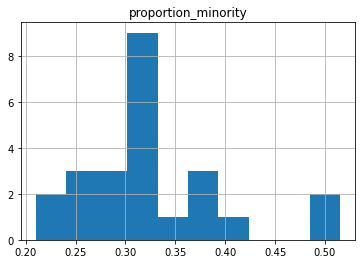

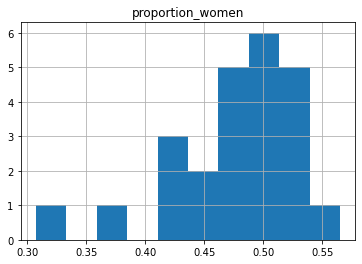

In [433]:
ranked_proportions_df.hist(column = 'proportion_minority')
ranked_proportions_df.hist(column = 'proportion_women')


In [434]:
# we will now do the same analysis on all schools so then we can compare
diversity_school_2014

,name,total_enrollment,state,category,enrollment
0,University of Phoenix-Arizona,195059,Arizona,Women,134722
1,University of Phoenix-Arizona,195059,Arizona,American Indian / Alaska Native,876
2,University of Phoenix-Arizona,195059,Arizona,Asian,1959
3,University of Phoenix-Arizona,195059,Arizona,Black,31455
4,University of Phoenix-Arizona,195059,Arizona,Hispanic,13984
...,...,...,...,...,...
50650,ITT Technical Institute at Cedar Rapids (Iowa),1,Iowa,White,1
50651,ITT Technical Institute at Cedar Rapids (Iowa),1,Iowa,Two Or More Races,0
50652,ITT Technical Institute at Cedar Rapids (Iowa),1,Iowa,Unknown,0
50653,ITT Technical Institute at Cedar Rapids (Iowa),1,Iowa,Non-Resident Foreign,0


In [435]:
# source for this dictionary: https://gist.github.com/rogerallen/1583593
# big thank you to Roger Allen for saving me time

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
}

# this one comes from: https://code.activestate.com/recipes/580661-states-to-regions/
# thank you to Jackson Killian for saving me time
# it was necessary to use both these dictionaries because the region dictionary only has abbreviation
# i could have changed the keys or values of either dictionary, but using both was fine

regions = {
        'AK': 'O',
        'AL': 'S',
        'AR': 'S',
        'AS': 'O',
        'AZ': 'W',
        'CA': 'W',
        'CO': 'W',
        'CT': 'N',
        'DC': 'N',
        'DE': 'N',
        'FL': 'S',
        'GA': 'S',
        'GU': 'O',
        'HI': 'O',
        'IA': 'M',
        'ID': 'W',
        'IL': 'M',
        'IN': 'M',
        'KS': 'M',
        'KY': 'S',
        'LA': 'S',
        'MA': 'N',
        'MD': 'N',
        'ME': 'N',
        'MI': 'W',
        'MN': 'M',
        'MO': 'M',
        'MP': 'O',
        'MS': 'S',
        'MT': 'W',
        'NA': 'O',
        'NC': 'S',
        'ND': 'M',
        'NE': 'W',
        'NH': 'N',
        'NJ': 'N',
        'NM': 'W',
        'NV': 'W',
        'NY': 'N',
        'OH': 'M',
        'OK': 'S',
        'OR': 'W',
        'PA': 'N',
        'PR': 'O',
        'RI': 'N',
        'SC': 'S',
        'SD': 'M',
        'TN': 'S',
        'TX': 'S',
        'UT': 'W',
        'VA': 'S',
        'VI': 'O',
        'VT': 'N',
        'WA': 'W',
        'WI': 'M',
        'WV': 'S',
        'WY': 'W',
        'Unknown' : 'U'
}

# making a list of states in the dataframe
state_abbrev = []
for state in diversity_school_2014['state']:
    try:
        state_abbrev.append(us_state_to_abbrev[state])
    except:
        state_abbrev.append('Unknown')
        continue
len(state_abbrev)

50655

In [436]:
# making a list of regions for the states in the dataframe
region = []
for state in state_abbrev:
    region.append(regions[state])

In [437]:
# adding the list as a pandas series to the dataframe
diversity_school_2014['region'] = region

In [438]:
diversity_school_2014['proportion'] = diversity_school_2014['enrollment'] / diversity_school_2014['total_enrollment']

In [439]:
count = 10
total_minority_proportion = []
for ind in diversity_school_2014.index:
    if ind == count:
        count += 11
        total_minority_proportion.append(diversity_school_2014['proportion'][ind])
        print (diversity_school_2014['name'][ind], diversity_school_2014['category'][ind], diversity_school_2014['proportion'][ind])
# printing to see if it is working correctly

University of Phoenix-Arizona Total Minority 0.35031452022208664
Ivy Tech Community College-Central Indiana Total Minority 0.23506509174261617
Liberty University Total Minority 0.2352471795627248
Lone Star College system Total Minority 0.6082282585200662
Miami Dade College Total Minority 0.8563879720195016
Grand Canyon University Total Minority 0.4441769388803287
Texas A&M University at College Station Total Minority 0.30102851951591447
University of Central Florida Total Minority 0.4104365856468149
Ohio State University Total Minority 0.17334796474743663
Houston Community College Total Minority 0.7455556318209898
Western Governors University Total Minority 0.24620812507566456
American Public University system Total Minority 0.37504996610994285
Walden University Total Minority 0.47426611481566644
Kaplan University at Davenport (Iowa) Total Minority 0.4374831788996117
Northern Virginia Community College Total Minority 0.5620253656262746
University of Texas at Austin Total Minority 0.425

In [440]:
count = 0
total_women_proportion = []
name = []
total_enrollment = []
region = []
for ind in diversity_school_2014.index:
    if ind == count:
        count += 11
        total_women_proportion.append(diversity_school_2014['proportion'][ind])
        name.append(diversity_school_2014['name'][ind]) 
        total_enrollment.append(diversity_school_2014['total_enrollment'][ind])
        region.append(diversity_school_2014['region'][ind])
        print (diversity_school_2014['name'][ind], diversity_school_2014['category'][ind], diversity_school_2014['proportion'][ind])

University of Phoenix-Arizona Women 0.6906730784019194
Ivy Tech Community College-Central Indiana Women 0.5864946972438829
Liberty University Women 0.5932923311113566
Lone Star College system Women 0.594682614021183
Miami Dade College Women 0.5802471005057082
Grand Canyon University Women 0.7486999229583975
Texas A&M University at College Station Women 0.4749521430193699
University of Central Florida Women 0.5509898464627182
Ohio State University Women 0.49137546723363396
Houston Community College Women 0.5835506898208525
Western Governors University Women 0.605731481641618
American Public University system Women 0.38250577868923685
Walden University Women 0.7639878899363839
Kaplan University at Davenport (Iowa) Women 0.7661194202006998
Northern Virginia Community College Women 0.5148095635791559
University of Texas at Austin Women 0.507941457330501
Ashford University Women 0.7048812381677304
University of Minnesota-Twin Cities Women 0.5166285412634172
Tarrant County College District W

In [441]:
# create the dataframe with just the key info
diversity_school_2014_final = pd.DataFrame({'name': name, 'total_enrollment' : total_enrollment, 'region' : region, 'proportion_minority' : total_minority_proportion, 'proportion_women' : total_women_proportion})
diversity_school_2014_final

,name,total_enrollment,region,proportion_minority,proportion_women
0,University of Phoenix-Arizona,195059,W,0.350315,0.690673
1,Ivy Tech Community College-Central Indiana,91179,M,0.235065,0.586495
2,Liberty University,81459,S,0.235247,0.593292
3,Lone Star College system,69395,S,0.608228,0.594683
4,Miami Dade College,66046,S,0.856388,0.580247
...,...,...,...,...,...
4600,ITT Technical Institute at West Covina (Calif.),8,W,1.000000,0.500000
4601,Danville Regional Medical Center School of Hea...,7,S,0.142857,0.857143
4602,Pace Institute,5,N,0.800000,0.400000
4603,ITT Technical Institute at Germantown (Wis.),4,M,0.500000,0.500000


In [442]:
# we will do a regional analysis as we did before
regions_all = diversity_school_2014_final.groupby(['region']).size().reset_index(name='counts')
regions_all

,region,counts
0,M,983
1,N,956
2,O,31
3,S,1509
4,U,31
5,W,1095


In [445]:
# there are a few of unknowns. let's see what's going on
for ind in diversity_school_2014_final.index:
    if diversity_school_2014_final['region'][ind] == 'U':
            print (diversity_school_2014_final['name'][ind])      
# we are getting NAs here so we will delete these rows

diversity_school_2014_final = diversity_school_2014_final.dropna()
diversity_school_2014_final

,name,total_enrollment,region,proportion_minority,proportion_women
0,University of Phoenix-Arizona,195059,W,0.350315,0.690673
1,Ivy Tech Community College-Central Indiana,91179,M,0.235065,0.586495
2,Liberty University,81459,S,0.235247,0.593292
3,Lone Star College system,69395,S,0.608228,0.594683
4,Miami Dade College,66046,S,0.856388,0.580247
...,...,...,...,...,...
4600,ITT Technical Institute at West Covina (Calif.),8,W,1.000000,0.500000
4601,Danville Regional Medical Center School of Hea...,7,S,0.142857,0.857143
4602,Pace Institute,5,N,0.800000,0.400000
4603,ITT Technical Institute at Germantown (Wis.),4,M,0.500000,0.500000


In [478]:
# mean for all institutions and nationally ranked
all_means = diversity_school_2014_final[['proportion_minority', 'proportion_women']].mean()
print('Mean Enrollment Values: All Postsecondary Institutions:')
print(all_means)
print('Mean Enrollment Values: Top 25 Nationally Ranked Research Universities')
print(top_25_means)
# on average, a US school of higher education in this sample enrolled 37.356 minority students and 58.29% female students in 2014
# same interpretation as before for the top 25 nationally ranked schools

Mean Enrollment Values: All Postsecondary Institutions:
proportion_minority    0.373563
proportion_women       0.582928
dtype: float64
Mean Enrollment Values: Top 25 Nationally Ranked Research Universities
proportion_minority    0.324903
proportion_women       0.477260
dtype: float64


array([[<AxesSubplot:title={'center':'proportion_women'}>]], dtype=object)

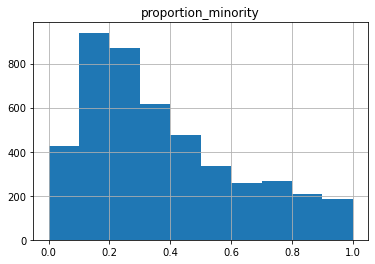

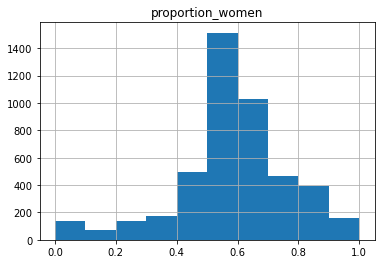

In [447]:
# visualizing the distributions

diversity_school_2014_final.hist(column = 'proportion_minority')
diversity_school_2014_final.hist(column = 'proportion_women')

In [448]:
# there should now be no more unknown values in the dataframe
regions_all = diversity_school_2014_final.groupby(['region']).size().reset_index(name='counts')
regions_all

,region,counts
0,M,983
1,N,956
2,O,31
3,S,1509
4,W,1095


In [449]:
# adding more informaiton to this table
# make lists to store the values of each region's demographics
M_m = []
N_m = []
S_m = []
W_m = []
O_m = []

M_w = []
N_w = []
S_w = []
W_w = []
O_w = []

for ind in diversity_school_2014_final.index:
    if diversity_school_2014_final['region'][ind] == 'M':
        M_m.append(diversity_school_2014_final['proportion_minority'][ind])
        M_w.append(diversity_school_2014_final['proportion_women'][ind])
    elif diversity_school_2014_final['region'][ind] == 'N':
        N_m.append(diversity_school_2014_final['proportion_minority'][ind])
        N_w.append(diversity_school_2014_final['proportion_women'][ind])
    elif diversity_school_2014_final['region'][ind] == 'S':
        S_m.append(diversity_school_2014_final['proportion_minority'][ind])
        S_w.append(diversity_school_2014_final['proportion_women'][ind])
    elif diversity_school_2014_final['region'][ind] == 'W':
        W_m.append(diversity_school_2014_final['proportion_minority'][ind])
        W_w.append(diversity_school_2014_final['proportion_women'][ind])
    elif diversity_school_2014_final['region'][ind] == 'O':
        O_m.append(diversity_school_2014_final['proportion_minority'][ind])
        O_w.append(diversity_school_2014_final['proportion_women'][ind])
    else:
        continue
# find all the means of the lists. store in a list that can be added as a column to the dataframe
def list_means(*args):
    means_list = []
    for arg in args:
        mean = sum(arg)/len(arg)
        means_list.append(mean)        
    return means_list
# get the means of proportion minority by region
proportion_minority = list_means(M_m, N_m, S_m, W_m, O_m)
# do the same except for women
proportion_women = list_means(M_w, N_w, S_w, W_w, O_w)
# add these values to the dataframe
regions_all['proportion_minority'] = proportion_minority
regions_all['proportion_women'] = proportion_women
regions_all


,region,counts,proportion_minority,proportion_women
0,M,983,0.261794,0.590997
1,N,956,0.291062,0.544612
2,O,31,0.459716,0.606046
3,S,1509,0.420148,0.576699
4,W,1095,0.622713,0.603325


In [450]:
# here is the one-line way to create a similar table with means
regions_example = diversity_school_2014_final.groupby(['region']).mean()
regions_example
# and I could easily add the counts by creating a dataframe with the counts, then merging them.

,total_enrollment,proportion_minority,proportion_women
region,,,
M,3825.305188,0.261794,0.590997
N,4092.943515,0.291062,0.544612
O,3478.580645,0.622713,0.603325
S,4270.017230,0.459716,0.606046
W,5356.494064,0.420148,0.576699


In [458]:
# now we can compare the proportions for all schools by region to the proportions for top top schools by region
# and see if there is a difference

# I can do a chi-square test but I have to do some additional preparation, mainly to make a frequency table
# we will use the proportions in all schools as the proportions expected. since other is in all schools, 
# we will have to add other to top 25 table we can do a hypothesis test

ranked_proportions_df['total_enrollment'] = ranked_proportions_df['total_enrollment']
ranked_proportions_df['minority_enrollment'] = ranked_proportions_df['total_enrollment'] * ranked_proportions_df['proportion_minority']
ranked_proportions_df['women_enrollment'] =  ranked_proportions_df['total_enrollment'] * ranked_proportions_df['proportion_women']

# now I will also need to find these values for the ranked schools
ranked_proportions_df.groupby(['region']).sum()

# making the frequency table for the chi-square test

freq_table = ranked_proportions_df.groupby(['region']).sum()
# these values (sum of the proportion) are meaningless, so I'm remvoing them
del freq_table['proportion_minority'], freq_table['proportion_women']

# the reminaing values are the observed frequencies. we need to calculate the expected frequencies
diversity_school_2014_final['minority_enrollment'] = diversity_school_2014_final['total_enrollment'] * diversity_school_2014_final['proportion_minority']
diversity_school_2014_final['women_enrollment'] =  diversity_school_2014_final['total_enrollment'] * diversity_school_2014_final['proportion_women']
expected = diversity_school_2014_final.groupby(['region']).sum()
expected

,total_enrollment,proportion_minority,proportion_women,minority_enrollment,women_enrollment
region,,,,,
M,3760275,257.343027,580.949929,919139.0,2128582.0
N,3912854,278.254877,520.648722,1309761.0,2192442.0
O,107836,19.304115,18.703084,65756.0,62953.0
S,6443456,693.712051,914.523366,2681641.0,3703426.0
W,5865361,460.061550,631.485747,2596400.0,3256554.0


In [459]:
# re-ordering the rows because I will have to add a row for "other" regions at the end of the freqency table
expected = expected.reindex(['M','N','S','W','O'])
# calculating expected frequencies now
expected['expected_minority'] = expected['minority_enrollment'] / expected['total_enrollment']
expected['expected_women'] = expected['women_enrollment'] / expected['total_enrollment']

# this is a different value than the one returned by aggregating by region using mean();
# aggregating by mean gives the mean of the proportions, whereas this gives the actual proportions
# the mean of the proportions is interesting but not what we want for the chi-square test
# we will multiply this value by the total enrollment at the ranked institutions by region to get the expected frequencies

# before we do that, I will need to add a row with O (for other)
other = {'total_enrollment' : 0, 'minority_enrollment' : 0, 'women_enrollment' : 0 , 'expected_minority_enrollment' : 0, 'expected_women_enrollment': 0}
tempdf = pd.DataFrame(other, index = ['O'])
freq_table.append(tempdf)

# we can now add the expected frequencies
freq_table['expected_minority_enrollment'] = freq_table['total_enrollment'] * expected['expected_minority']
freq_table['expected_women_enrollment'] = freq_table['total_enrollment'] * expected['expected_women']

In [460]:
freq_table
# we can see what appear to be fairly substantial differences
# let's find out if they are statistically signficant

,ranking,total_enrollment,minority_enrollment,women_enrollment,expected_minority_enrollment,expected_women_enrollment
region,,,,,,
M,50,63178,16578.0,29284.0,15442.850255,35763.223061
N,76,171459,53416.0,84230.0,57392.969760,96071.540844
S,63,49932,15309.0,25882.0,20780.726742,28698.801859
W,105,184660,73800.0,91668.0,81742.832879,102526.555764


In [488]:
# we will do a chi-square test for minority enrollment and also one for women enrollment
# observed frequencies are the first argument, and expected frequencies the second

test = 'chi-square test of independence: region and minority enrollment at top-25 nationally ranked research universities'
alpha = 0.05
chi_square = stats.chisquare(freq_table['minority_enrollment'],freq_table['expected_minority_enrollment'])
H0 = 'there is no relationship between region and minority enrollment for the top-25 nationally ranked research universities.'
Ha = 'there is a relationship between region and minority enrollment for the top-25 nationally ranked research universities.'
p_value = chi_square[1]
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
    
print(test)
print('H0:',H0)
print('Ha:',Ha)
print("chisquare-score is:", chi_square[0], " and p value is:", p_value)
print(conclusion)
print('I am', int((1-alpha)*100),'% confident that',Ha)

test = 'chi-square test of independence: region and female enrollment at top-25 nationally ranked research universities'
alpha = 0.05
chi_square = stats.chisquare(freq_table['women_enrollment'],freq_table['expected_women_enrollment'])
H0 = 'there is no relationship between region and female enrollment for the top-25 nationally ranked research universities.'
Ha = 'there is a relationship between region and female enrollment for the top-25 nationally ranked research universities.'
p_value = chi_square[1]
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."

print(test)
print('H0:',H0)
print('Ha:',Ha)
print("chisquare-score is:", chi_square[0], " and p value is:", p_value)
print(conclusion)
print('I am', int((1-alpha)*100),'% confident that',Ha)

chi-square test of independence: region and minority enrollment at top-25 nationally ranked research universities
H0: there is no relationship between region and minority enrollment for the top-25 nationally ranked research universities.
Ha: there is a relationship between region and minority enrollment for the top-25 nationally ranked research universities.
chisquare-score is: 2571.561456295607  and p value is: 0.0
Null Hypothesis is rejected.
I am 95 % confident that there is a relationship between region and minority enrollment for the top-25 nationally ranked research universities.
chi-square test of independence: region and female enrollment at top-25 nationally ranked research universities
H0: there is no relationship between region and female enrollment for the top-25 nationally ranked research universities.
Ha: there is a relationship between region and female enrollment for the top-25 nationally ranked research universities.
chisquare-score is: 4059.8967077085344  and p value 

In [501]:
# comapring ranked schools to all schools using welch's 2-sample t-test
test = "1-Tailed Welch's 2-Sample T-Test: mean minority enrollment at top-25 nationally ranked research universities vs mean minority enrollment at all schools"
alpha = 0.05
ttest = stats.ttest_ind(ranked_proportions_df['proportion_minority'], 
                        diversity_school_2014_final['proportion_minority'], equal_var=False, )
H01 = 'there is no difference between mean proportion of minority students enrolled at the top-25 nationally ranked universities compared to all schools.'
Ha1 = 'the mean proportion of minority students enrolled at top-25 nationally ranked universities is lower than at all schools.'
p_value = ttest[1]
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."

print(test)
print('H0:',H01)
print('Ha:',Ha1)    
print("t-test score is:", ttest[0], " and p value is:", p_value)
print(conclusion)
print('I am', int((1-alpha)*100),'% confident that',Ha1)

test = "1-Tailed Welch's 2-Sample T-Test: mean female enrollment at top-25 ranked national research universities vs mean female enrollment at all schools"
alpha = 0.05
ttest = stats.ttest_ind(ranked_proportions_df['proportion_women'], 
                        diversity_school_2014_final['proportion_women'], equal_var=False, )
H02 = 'There is no difference between in mean proportion of female students enrolled at the top-25 nationally ranked universities compared to all schools.'
Ha2 = 'The mean proportion of female students enrolled at top-25 nationally ranked universities is lower than at all schools.'
p_value = ttest[1]
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
    
print(test)
print('H0:',H02)
print('Ha:',Ha2)
print("t-test score is:", ttest[0], " and p value is:", p_value)
print(conclusion)
print('I am', int((1-alpha)*100),'% confident that',Ha2)

1-Tailed Welch's 2-Sample T-Test: mean minority enrollment at top-25 nationally ranked research universities vs mean minority enrollment at all schools
H0: there is no difference between mean proportion of minority students enrolled at the top-25 nationally ranked universities compared to all schools.
Ha: the mean proportion of minority students enrolled at top-25 nationally ranked universities is lower than at all schools.
t-test score is: -3.262380017122981  and p value is: 0.003076096148376409
Null Hypothesis is rejected.
I am 95 % confident that the mean proportion of minority students enrolled at top-25 nationally ranked universities is lower than at all schools.
1-Tailed Welch's 2-Sample T-Test: mean female enrollment at top-25 ranked national research universities vs mean female enrollment at all schools
H0: There is no difference between in mean proportion of female students enrolled at the top-25 nationally ranked universities compared to all schools.
Ha: The mean proportion o

In [463]:
# we also can compare the ranked schools to all schools
# we can compare the mean demographic values using a 1-sample t-test
test = "1-Tailed Welch's 2-Sample T-Test"
alpha = 0.05
ttest = stats.ttest_ind(ranked_proportions_df['proportion_women'], diversity_school_2014_final['proportion_women'], equal_var=False, )
H0: 'There is no difference between in mean proportion of minority studnets enrolled at the top-25 nationally ranked universities compared to all schools.'
Ha = 'The mean proportion of minoority studnets enrolled at top-25 nationally ranked universities is lower than at all schools.'
p_value = ttest[1]
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
  
print(test)
print('H0:',H0)
print('Ha:',Ha)
print("t-test score is:", ttest[0], " and p value is:", p_value)
print(conclusion)
print('I am', int((1-alpha)*100),'% confident that',Ha)

print("chisquare-score is:", chi_square[0], " and p value is:", p_value)
print(conclusion)
print('I am', int((1-alpha)*100),'% confident that',Ha)

# I am 95% confident that the mean proportion of minority students at nationally ranked schools is lower than at all schools.

t-test schore is: -8.865673330481213  and p value is: 2.7780537123678472e-09
Null Hypothesis is rejected.


In [ ]:
# this is the code used for the conclusions, question 3 (all in one place, it is already present above)
ranked_proportions_df.hist(column = 'proportion_minority')
ranked_proportions_df.hist(column = 'proportion_women')
diversity_school_2014_final.hist(column = 'proportion_minority')
diversity_school_2014_final.hist(column = 'proportion_women')
top_25_means = ranked_proportions_df[['proportion_minority', 'proportion_women']].mean()
all_means = diversity_school_2014_final[['proportion_minority', 'proportion_women']].mean()
print('Mean Enrollment Values: All Postsecondary Institutions:')
print(all_means)
print('Mean Enrollment Values: Top 25 Nationally Ranked Research Universities')
print(top_25_means)